# Taller 5 <br>
Implementar en <b>Notebook Jupyter</b> una Sistema de línea de espera con un servidor (Modelo de colas G/G/1) 


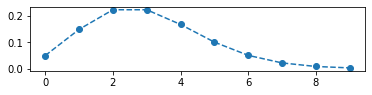

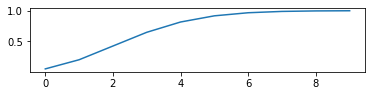

Tasa de llegada [5, 1, 1, 5, 1, 3, 3, 4, 1, 4]
t   N llegada   N en cola   Atendidosxservidor   Cliente en Sistema
  
0        5        0.00          0.00                    5
1        1        5.00          2.75                    6
2        1        3.25          4.48                    4
3        5        0.00          6.08                    5
4        1        0.00          5.65                    1
5        3        0.00          0.00                    3
6        3        3.00          0.00                    6
7        4        6.00          7.03                    10
8        1        2.97          0.00                    3
9        4        3.97          12.72                    7
Tiempo promedio en cola: 12.86 Minutos
Tiempo promedio en sistema: 6.90 Minutos
Tiempo promedio en servidor: 9.30 Minutos


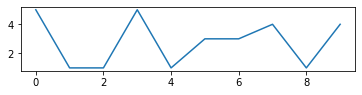

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from scipy.integrate import quad

l=3
k=10
a=[]
acum=[]
invepoi=[]
plt.subplot(3,1,1)
def poisson():
    for i in range(k):
        f=(math.exp(-l)*l**i)/math.factorial(i)
        a.append(f)
    return a
plt.plot(poisson(),marker="o",linestyle="--")
plt.show()
plt.subplot(3,1,2)

def acumupoisson():
    g=0
    for i in range(k):
        g=a[i]+g
        acum.append(g)
    return acum
plt.plot(acumupoisson())
plt.show()
plt.subplot(3,1,3)

def aleatorios(al):
    xo=al
    ga=[]
    for i in range(k):
        mod=(223*xo+23)%829
        ui=float(mod)/829
        xo=mod
        ga.append(ui)
    #print(ga)
    return ga

def inverpoisson():
    ga=aleatorios(7)
    for i in range(k):
        for j in range(k):
            if ga[i]<acum[j]:
                invepoi.append(j)
                break
    print("Tasa de llegada",invepoi)
    return invepoi


inp=inverpoisson()
plt.plot(inp)
plt.show()


#normal
o=1
u=1

def invnormal():
    invn=[]
    gan=aleatorios(19)
    for i in range(k):
        x=(2*gan[i])-1
        pr=2/float(math.sqrt(math.pi))
        y,e=quad(lambda t: math.exp(-t**2),0,x)
        error=pr*y
        inver=u+(o*math.sqrt(2)*(1/error))
        if(inver<0):
            inver=0
        invn.append(inver)
    return invn
gg=invnormal()



#numero de clientes en cola
cc=[]
ll=0
def cliencola(ll):
    cc.append(ll)
    for i in range(k-1):
        ll=(inp[i]+ll)-gg[i]
        if ll<0:
            ll=0
        cc.append(ll)
    return cc
x=cliencola(ll)

        


#numero de horas=6
print("t", "  N llegada","  N en cola","  Atendidosxservidor","  Cliente en Sistema")
print("  ")
for i in range(k):
    print(i, "      ",invepoi[i]  ,  "      ", "{0:.2f}".format(x[i]),"        " ,"{0:.2f}".format(gg[i]),"                  " ,int(invepoi[i]+x[i]))
def tpcola():
    s=0
    for i in range(k):
        
        s=invepoi[i]+s
    #print(s)
    z=(6/float(s))*60
    print("Tiempo promedio en cola:","{0:.2f}".format(z), "Minutos")
    return s
f=tpcola()   
def tpsistema():
    ss=0
    for i in range(k):
        ss=(invepoi[i]+x[i])+ss
    #print(s)
    zi=(6/float(ss))*60
    print("Tiempo promedio en sistema:","{0:.2f}".format(zi), "Minutos")
    return ss
fg=tpsistema()  
def tpservidor():
    ser=0
    for i in range(k):
        ser=gg[i]+ser
    #print(s)
    ze=(6/float(ser))*60
    print("Tiempo promedio en servidor:","{0:.2f}".format(ze), "Minutos")
    return ser
fk=tpservidor() 





